# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

In [40]:
from IPython.display import Image
Image(url ="https://i.imgur.com/49FNOHj.jpg")

# Import Statements

In [41]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [42]:
df_color =  pd.read_csv("./data/colors.csv")
df_color

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [43]:
df_color.name.nunique()

135

In [44]:
print(df_color.is_trans[df_color.is_trans == "f"].count())
print(df_color.is_trans[df_color.is_trans == "t"].count())

107
28


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [45]:
df_color.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [46]:
df_color.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [47]:
Image(url = "https://i.imgur.com/aKcwkSx.png")

In [48]:
Image(url = "https://i.imgur.com/whB1olq.png")

In [49]:
sets = pd.read_csv("./data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [50]:
min_year = sets.year.min()

print("year is ",min_year)


year is  1949


In [51]:
data = pd.DataFrame(sets[sets.year == min_year])
data

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [52]:
data.name.count()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [53]:
sets.sort_values('num_parts', ascending= False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [72]:
sets.groupby('year')['num_parts'].sum()

year
1949       498
1950         6
1953        54
1954       173
1955      1025
         ...  
2017    174367
2018    174313
2019    174309
2020    175060
2021         0
Name: num_parts, Length: 71, dtype: int64

In [82]:
sets[sets.year==1955].sum()['num_parts']

1025

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [83]:
import matplotlib.pyplot as plt

<Axes: xlabel='year'>

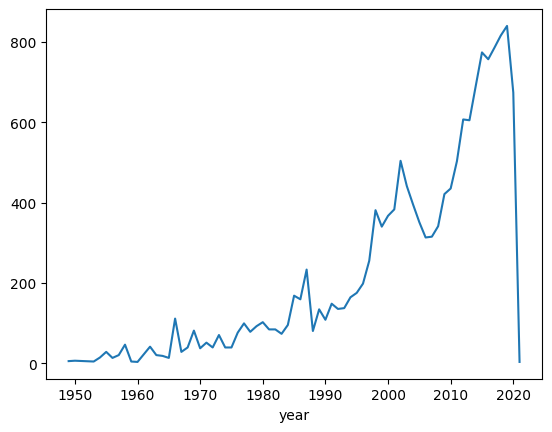

In [106]:
data = sets.groupby('year')['set_num'].count()
data.plot(x = 'year',y ='set_num', kind = "line")

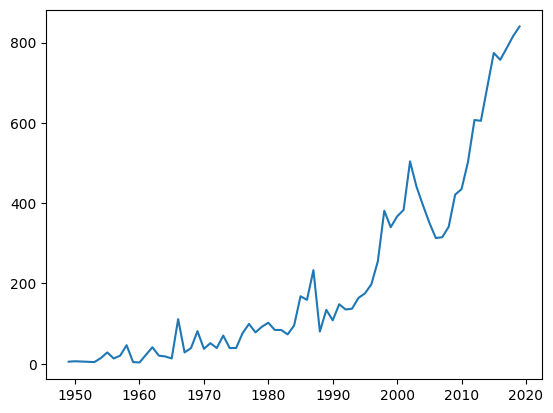

In [127]:
data = sets.groupby('year').count()
plt.plot(data.index[:-2], data.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [95]:
theme_by_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})
theme_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

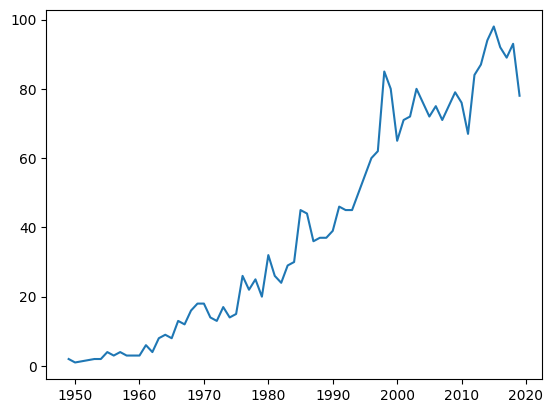

In [128]:
plt.plot(theme_by_year.index[:-2],theme_by_year.theme_id[:-2])

### Line Charts with Two Seperate Axes

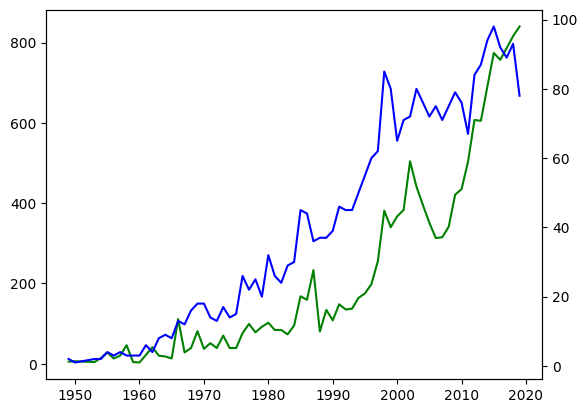

In [144]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(data.index[:-2], data.set_num[:-2],'g')
ax2.plot(theme_by_year.index[:-2],theme_by_year.theme_id[:-2],'b')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [137]:
parts_by_set = sets.groupby('set_num').mean()
print(parts_by_set.num_parts)

set_num
00-6             0.0
001-1           43.0
0011-2          12.0
0011-3           0.0
0012-1          12.0
                ... 
tominifigs-1     0.0
trucapam-1      72.0
tsuper-1         0.0
vwkit-1         22.0
wwgp1-1          0.0
Name: num_parts, Length: 15710, dtype: float64


/tmp/ipykernel_304832/3281220408.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parts_by_set = sets.groupby('set_num').mean()


In [142]:

print("Parts in 1954", parts_by_set.num_parts[parts_by_set.year == 1954].mean())
print("Parts in 2017", parts_by_set.num_parts[parts_by_set.year == 2017].mean())

Parts in 1954 12.357142857142858
Parts in 2017 221.8409669211196


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

/tmp/ipykernel_304832/2645613755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parts_by_set = sets.groupby('year').mean()


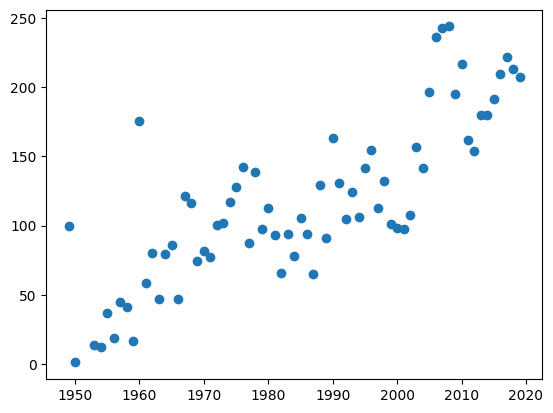

In [149]:
parts_by_set = sets.groupby('year').mean()
#parts_by_set
plt.scatter(x = parts_by_set.index[:-2],y = parts_by_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [174]:
data = sets.groupby('theme_id').count()
max_value = data.num_parts.idxmax()
print("Theme id ", max_value," have maximum number of parts")

Theme id  158  have maximum number of parts


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

In [175]:
Image(url ="https://i.imgur.com/Sg4lcjx.png")

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [187]:
theme = pd.read_csv("./data/themes.csv")
star_theme = theme[theme.name == "Star Wars"]
star_theme

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [189]:
for x in star_theme.id:
    print(sets[sets.theme_id == x])

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
           set_num                                              

In [191]:
theme_1 = theme.rename(columns={"id": 'theme_id'})
theme_1

,theme_id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


### Merging (i.e., Combining) DataFrames based on a Key


In [196]:
merged_data = pd.merge(sets, theme_1, on='theme_id')
merged_data[merged_data.name_y == 'Star Wars']

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id
6343,11912-1,Star Wars: Build Your Own Adventure,2016,158,73,Star Wars,NaN
6344,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70,Star Wars,NaN
6345,20006-1,Clone Turbo Tank - Mini,2008,158,64,Star Wars,NaN
6346,20007-1,Republic Attack Cruiser - Mini,2009,158,84,Star Wars,NaN
6347,20009-1,AT-TE Walker - Mini,2009,158,94,Star Wars,NaN
...,...,...,...,...,...,...,...
15162,75279-1,Star Wars Advent Calendar 2020,2020,209,312,Star Wars,207.0
15163,7958-1,Star Wars Advent Calendar 2011,2011,209,267,Star Wars,207.0
15164,9509-1,Star Wars Advent Calendar 2012,2012,209,235,Star Wars,207.0
15689,9748-1,Droid Developer Kit,1999,261,658,Star Wars,258.0


In [202]:
data = merged_data.groupby("name_y").count()
data

,set_num,name_x,year,theme_id,num_parts,parent_id
name_y,,,,,,
12V,52,52,52,52,52,52
4 Juniors,22,22,22,22,22,0
4.5V,86,86,86,86,86,86
9V,51,51,51,51,51,51
Action Wheelers,9,9,9,9,9,9
...,...,...,...,...,...,...
Xalax,16,16,16,16,16,16
Xtra,17,17,17,17,17,0
Znap,19,19,19,19,19,0


<BarContainer object of 10 artists>

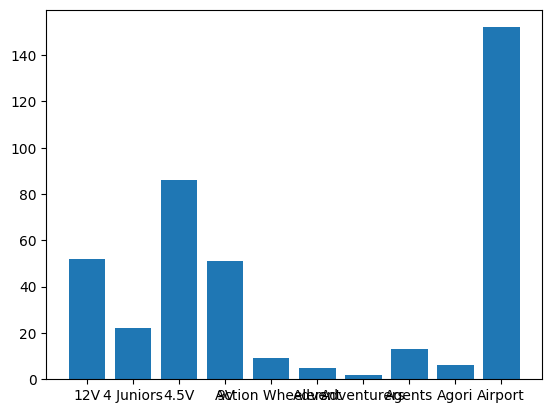

In [205]:
plt.bar(data.index[:10],data.set_num[:10])

<BarContainer object of 10 artists>

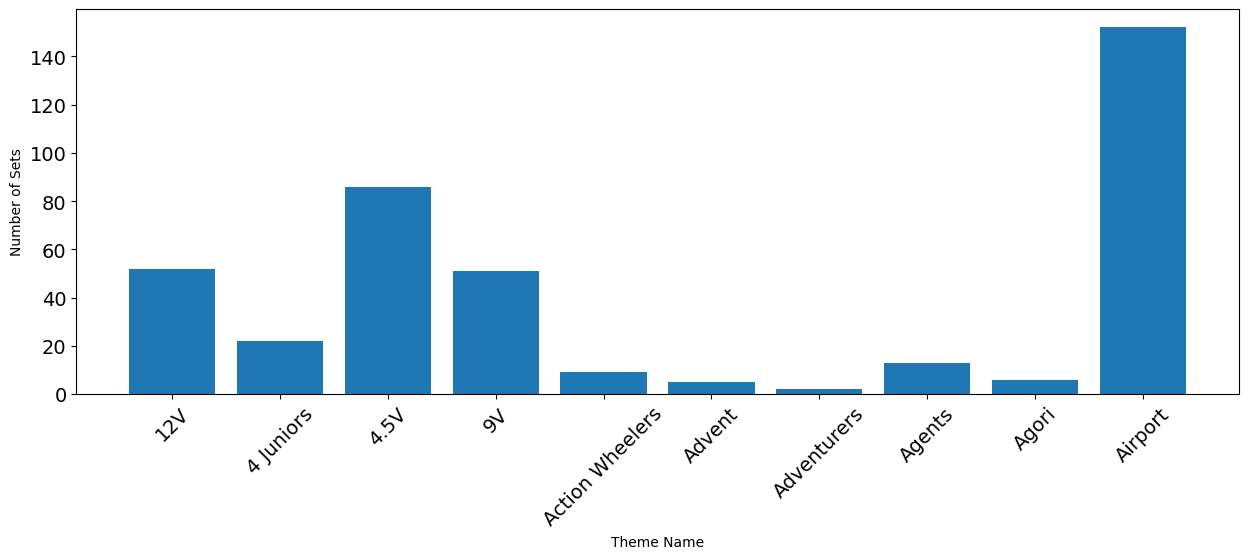

In [213]:
plt.figure(figsize =(15,5))
plt.xticks(fontsize =14,rotation =45)
plt.yticks(fontsize =14)
plt.xlabel("Theme Name")
plt.ylabel("Number of Sets")
plt.bar(data.index[:10],data.set_num[:10])